In [244]:
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Get overview of data and missing values

In [245]:
print('train_data')
print(train_data.isnull().sum())
print('-'*20)
print('test_data')
print(test_data.isnull().sum())
datasets = [train_data,test_data]

train_data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
test_data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Complete Data

In [67]:
for dataset in datasets:
    dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(value=dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(value=dataset['Fare'].median(), inplace=True)

## Check

In [68]:
print('train_data')
print(train_data.isnull().sum())
print('-'*20)
print('test_data')
print(test_data.isnull().sum())

train_data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------
test_data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Feature to choose
* Survived
* Pclass
* Sex : male=0,female=1
* Age
* SibSp
* Parch
* Fare
* Embarked S = (1,0,0), C = (0,1,0), Q = (0,0,1)
* Name Title
## Feature to drop
* Ticket
* Cabin

In [69]:
import numpy as np
import random

In [70]:
class Data:
    def __init__(self,all_data,rate=None):
        if rate is None:
            rate = [0.6,0.2,0.2]
        m = all_data.shape[0]
        split_num1 = int(m*rate[0])
        split_num2 = int(m*rate[1]) + split_num1
        indexes = list(range(m))
        random.shuffle(indexes)
        
        train_index = indexes[:split_num1]
        val_index = indexes[split_num1:split_num2]
        test_index = indexes[split_num2:]
        
        train = all_data.iloc[train_index]
        val = all_data.iloc[val_index]
        test = all_data.iloc[test_index]
        
        self.rate = rate
        self.m = m
        self.split_num1 = split_num1
        self.split_num2 = split_num2
        self.train_ind = train_index
        self.val_index = val_index
        self.test_index = test_index
        self.train = train
        self.val = val
        self.test = test
        

In [71]:
def to_train(data):
    data.loc[data.Sex=='male','Sex'] = 0
    data.loc[data.Sex=='female','Sex'] = 1
    data['Embarked1'] = 0
    data['Embarked2'] = 0
    data['Embarked3'] = 0
    data.loc[data.Embarked=='S','Embarked1'] = 1
    data.loc[data.Embarked=='C','Embarked2'] = 1
    data.loc[data.Embarked=='Q','Embarked3'] = 1
    
    
    data['Title'] = data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
    data['Title'] = data['Title'].replace({'Ms': 'Miss', 'Mme': 'Mrs', 'Mlle':'Miss'})
    stat_min = 10
    title_names = data['Title'].value_counts() < stat_min
    data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    title = ['Mr','Miss','Mrs','Master','Misc']
    for t in title:
        data[t] = 0
        data.loc[data.Title==t,t] = 1    
    
    return data.drop(columns=['Embarked','Name','Title','Ticket','Cabin'])
to_train_data = to_train(datasets[0])

In [72]:
to_train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3,Mr,Miss,Mrs,Master,Misc
0,1,0,3,0,22.0,1,0,7.2500,1,0,0,1,0,0,0,0
1,2,1,1,1,38.0,1,0,71.2833,0,1,0,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0
5,6,0,3,0,28.0,0,0,8.4583,0,0,1,1,0,0,0,0
6,7,0,1,0,54.0,0,0,51.8625,1,0,0,1,0,0,0,0
7,8,0,3,0,2.0,3,1,21.0750,1,0,0,0,0,0,1,0
8,9,1,3,1,27.0,0,2,11.1333,1,0,0,0,0,1,0,0
9,10,1,2,1,14.0,1,0,30.0708,0,1,0,0,0,1,0,0


In [73]:
import warnings  
warnings.filterwarnings('error')  

In [212]:
import matplotlib.pyplot as plt
import itertools
import sys
class LR:
    def __init__(self,whichset,poly=1):
        self.poly = poly
        self.norm = []
        self.X, self.y, n = self.formating(whichset,self.poly,'self')
        self.theta = np.zeros((n+1,1))
    
    def formating(self,whichset,poly,mode):
        X = whichset.drop(columns=['PassengerId','Survived']).values
        X += 1
        X = self.feature_map(X,poly)
        y = whichset.Survived.values.reshape(-1,1)
        m, n = X.shape
        if mode == 'self':
            X = self.normlization_self(X)
        elif mode == 'other':
            X = self.normlization_other(X)
        X = np.hstack((np.ones((m,1)),X))
        return X,y,n
    
    def feature_map(self,X,order):
        if order == 1:
            return X
        m, n = X.shape
        for i in itertools.combinations_with_replacement(list(range(n)),order):
            feature = np.ones(m)
            for j in range(order):
                feature *= X[:,i[j]]
            feature = feature.reshape((-1,1))
            X = np.hstack((X,feature))
        return X
        
    def normlization_self(self,X):
        n = X.shape[1]
        for i in range(n):
            mean = X[:,i].mean()
            std = X[:,i].std()
            if std < 0.000001:
                self.norm.append((mean,1))
                X[:,i] = (X[:,i] - mean)
                continue
            self.norm.append((mean,std))
            try:
                X[:,i] = (X[:,i] - mean)/std
            except Warning as e:
                print(e)
                print('normlization_self warning')
        return X

    def normlization_other(self,X):
        n = X.shape[1]
        for i in range(n):
            mean = self.norm[i][0]
            std = self.norm[i][1]
            try:
                X[:,i] = (X[:,i] - mean)/std
            except Warning as e:
                print(e)
                print('normlization_other warning')
        return X    
    
    def sigmoid(self,x):
        try:
            ret = 1/(1+np.power(np.e,-x))
        except Warning as e:
            print(e)
            print('sigmoid warning')
        return ret
    
    def costANDgradient(self,X,y,theta,lambda_):
        m = X.shape[0]
        y_pred = self.sigmoid(X.dot(theta))
        y_pred[y_pred>=0.99999999] = 0.99999999
        y_pred[y_pred<=0.00000001] = 0.00000001
        try:
            J = -1./m*((y.T).dot(np.log(y_pred))+(1-y).T.dot(np.log(1-y_pred))) + lambda_/2/m*(theta.sum()-theta[0][0])
            grad_J = 1/m*((X.T).dot(y_pred-y)) + lambda_/m*theta
            return J,grad_J
        except Warning as e:
            print(e)
            print('costANDgradient warning')
            print(y_pred)
            sys.exit(1)
    
    def train(self,lambda_,maxIter=100,alpha=0.1,needcost=True):
        J_history = np.zeros(maxIter)
        for i in range(maxIter):
            J_history[i],grad = self.costANDgradient(self.X,self.y,self.theta,lambda_)
            self.theta -= alpha*grad
            if needcost and i%(int(maxIter/3)) is 0:
                print('Iteration{},cost={}'.format(i,J_history[i]))              
        plt.plot(list(range(maxIter)),J_history)
        
    def __call__(self,whichset):
        X,y,_ = self.formating(whichset,self.poly,'other')
        cost,grad = self.costANDgradient(X,y,self.theta,0)
        y_pred = self.prediction(X,y,self.theta)        
        accuracy,P,R,F1 = self.validation(y,y_pred)
        return {
            'cost':float(cost),
            'accuracy':accuracy*100,
            'precision':P*100,
            'recall':R*100,
            'F1':F1*100}
    
    def prediction(self,X,y,theta):
        y_pred = self.sigmoid(X.dot(theta))
        y_pred[y_pred<0.5] = 0
        y_pred[y_pred>0.5] = 1
        return y_pred
    
    def pred(self,whichset):
        X,y,_ = self.formating(whichset,self.poly,'other')
        y_pred = self.sigmoid(X.dot(self.theta))
        ret = np.zeros(y_pred.shape,dtype='int64')
        for i in range(ret.size):
            if y_pred[i][0] > 0.5:
                ret[i][0] = 1
        #print(ret)
        return ret
    
    
    def validation(self,y,y_pred):        
        ret = (y_pred == y)
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for num in range(y.size):
            if y[num][0] == y_pred[num][0]:
                if y[num][0] == 1: # 不可以写is 1，是int64位的
                    TP += 1
                else:
                    TN += 1
            else:
                if y[num][0] == 1:
                    FN += 1
                else:
                    FP += 1
        try:
            P = TP/(TP+FP)
            R = TP/(TP+FN)
            F1 = 2*R*P/(R+P)
        except:
            P = 0
            R = 0
            F1 = 0
            print(TP,TN,FP,FN)
        return ret.sum()/ret.size,P,R,F1
        

## Code Validate

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.41023008945812217
Iteration666,cost=0.4090536163288155
Iteration999,cost=0.4088447136618194


{'F1': 73.84615384615385,
 'accuracy': 80.89887640449437,
 'cost': 0.431279582229612,
 'precision': 73.84615384615385,
 'recall': 73.84615384615385}

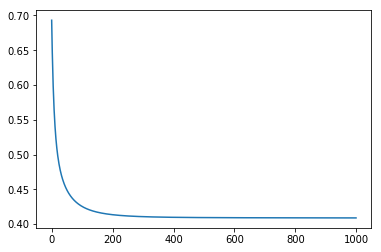

In [213]:
data = Data(to_train_data)
lr = LR(data.train,1)
lr.train(0.5,1000,0.1)
lr(data.val)

## Use Cross Validation to get best $\lambda$ and order 
n = 16
$C^{4}_{16} = 1820$
$C^{5}_{16} = 4368$
so I set the highest order to 4

In [214]:
def check(poly):
    df_train = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
    df_val = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
    plt.hold(True)
    for i in range(10):
        data = Data(to_train_data)
        lr = LR(data.train,poly)
        lr.train(0,1000,0.1)
        df_train = df_train.append(lr(data.train),ignore_index=True)
        df_val = df_val.append(lr(data.val),ignore_index=True)
    plt.hold(False)
    return df_train, df_val

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.40846206360244247
Iteration666,cost=0.4074989916031048
Iteration999,cost=0.40741399178912197
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.37983157758300035
Iteration666,cost=0.37865648628692933
Iteration999,cost=0.378544626383724
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.38985670829665775
Iteration666,cost=0.38903829915124943
Iteration999,cost=0.38893136254507377
Iteration0,cost=0.6931471805599454
Iteration333,cost=0.4000091429879732
Iteration666,cost=0.399428054010107
Iteration999,cost=0.3993986814525138
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.4304613906939321
Iteration666,cost=0.42971688143575726
Iteration999,cost=0.4296307431013285
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.40911875337588494
Iteration666,cost=0.4082333879799873
Iteration999,cost=0.40801672754697943
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.38652767168337937
Iteration666,cost=0.38549385967274374
Itera

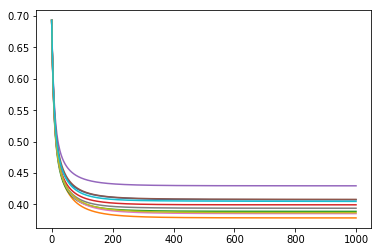

In [215]:
dt,dv = check(1)

In [216]:
dt.describe().loc['mean','accuracy']

83.48314606741573

In [217]:
dv.describe().loc['mean','accuracy']

81.85393258426966

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3906942713750294
Iteration666,cost=0.38280208493280504
Iteration999,cost=0.3773544745285471
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.36114300260707843
Iteration666,cost=0.3511059714545281
Iteration999,cost=0.3450459535007765
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.36235106899123165
Iteration666,cost=0.3530965955668083
Iteration999,cost=0.3476459959860534
Iteration0,cost=0.6931471805599454
Iteration333,cost=0.34702707652448617
Iteration666,cost=0.33575076856889213
Iteration999,cost=0.32889000348857783
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.38019742839302173
Iteration666,cost=0.3692640884320673
Iteration999,cost=0.3623711178148356
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.37933094600378414
Iteration666,cost=0.3704827867916043
Iteration999,cost=0.3648960524303696
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3968008532446532
Iteration666,cost=0.38728100894279344
Iterat

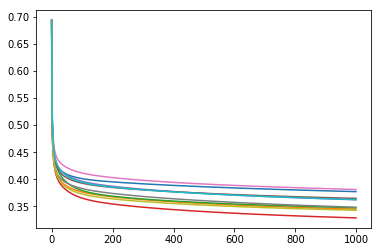

In [218]:
dt2,dv2 = check(2)

In [219]:
dt2.describe().loc['mean','accuracy']

85.78651685393257

In [220]:
dv2.describe().loc['mean','accuracy']

82.13483146067415

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3559586788204112
Iteration666,cost=0.3446931291326923
Iteration999,cost=0.3385514867323609
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3617446087543353
Iteration666,cost=0.3501153176888204
Iteration999,cost=0.3438047724622859
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.34760045565260894
Iteration666,cost=0.33734385052748783
Iteration999,cost=0.3309674454924859
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.33679162040576505
Iteration666,cost=0.3264792233591154
Iteration999,cost=0.3202011455418202
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.34983407478721307
Iteration666,cost=0.3400593150666761
Iteration999,cost=0.3348508272200242
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3495355894064453
Iteration666,cost=0.3374777202347855
Iteration999,cost=0.3316264407546056
Iteration0,cost=0.6931471805599454
Iteration333,cost=0.35531483138342135
Iteration666,cost=0.34404871113312596
Iteration

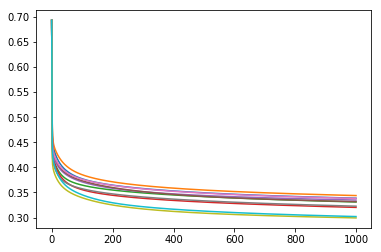

In [221]:
dt3,dv3 = check(3)

In [222]:
dt3.describe().loc['mean','accuracy']

86.27340823970037

In [223]:
dv3.describe().loc['mean','accuracy']

81.34831460674157

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.7712027346700904
Iteration666,cost=0.5896551652349377
Iteration999,cost=0.774846710844561
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.44790737253981394
Iteration666,cost=0.588760969348874
Iteration999,cost=0.4370031994232434
Iteration0,cost=0.6931471805599454
Iteration333,cost=0.9379454130516036
Iteration666,cost=0.5580210138723246
Iteration999,cost=0.6923703195285633
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.5501283768445191
Iteration666,cost=0.6360449992326993
Iteration999,cost=0.37898958027860036
Iteration0,cost=0.6931471805599453
Iteration333,cost=1.8360179999799324
Iteration666,cost=0.709611605175909
Iteration999,cost=0.8588720521730832
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.6723545606831004
Iteration666,cost=0.49238744720413596
Iteration999,cost=0.5443677969014089
Iteration0,cost=0.6931471805599453
Iteration333,cost=1.056801248977709
Iteration666,cost=0.4269401439729806
Iteration999,cos

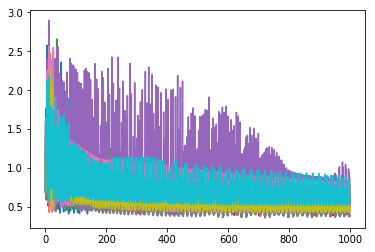

In [224]:
dt4,dv4 = check(4)

In [225]:
dt4.describe().loc['mean','accuracy']

82.99625468164793

In [226]:
dv4.describe().loc['mean','accuracy']

77.35955056179776

In [227]:
accuracy_on_training = [item.describe().loc['mean','accuracy'] for item in [dt,dt2,dt3,dt4]]
accuracy_on_val = [item.describe().loc['mean','accuracy'] for item in [dv,dv2,dv3,dv4]]

## Error on Training set and Val set
which shows 2 is the best choice

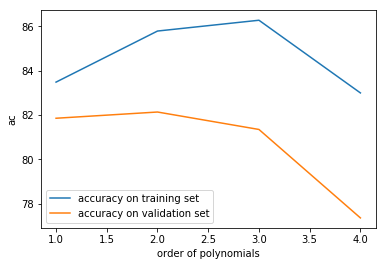

In [229]:
warnings.filterwarnings('ignore')
plt.plot([1,2,3,4],accuracy_on_training)
plt.hold(True)
plt.plot([1,2,3,4],accuracy_on_val)
plt.hold(False)
plt.xlabel('order of polynomials')
plt.ylabel('ac')
plt.legend(['accuracy on training set','accuracy on validation set'])

In [230]:
def check_lambda(lambda_,poly):
    average = []
    for lmd in lambda_:
        df_train = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
        df_val = pd.DataFrame(columns = ['cost','accuracy','precision','recall','F1'])
        for i in range(10):
            data = Data(to_train_data)
            lr = LR(data.train,poly)
            lr.train(lmd,1000,0.1)
            df_val = df_val.append(lr(data.val),ignore_index=True)
        average.append(df_val.describe().loc['mean','cost'])
    plt.plot(lambda_,average)
    return average

In [236]:
lmd = list(range(0,20,2))

In [237]:
lmd

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3796924922529493
Iteration666,cost=0.3685039957677399
Iteration999,cost=0.36113161196652543
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3595059031883035
Iteration666,cost=0.3480796580741826
Iteration999,cost=0.34118052057786646
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.403346512704456
Iteration666,cost=0.3928495092527396
Iteration999,cost=0.3858113356983506
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.35525222191154027
Iteration666,cost=0.3454359630825176
Iteration999,cost=0.3392728457027409
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3927944572539401
Iteration666,cost=0.3836808984408863
Iteration999,cost=0.37763568234550254
Iteration0,cost=0.6931471805599454
Iteration333,cost=0.41340434511247487
Iteration666,cost=0.4038665748340379
Iteration999,cost=0.3975171697062259
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.34129611108188784
Iteration666,cost=0.33253104015263163
Iteration

Iteration333,cost=0.3529575639915896
Iteration666,cost=0.3484505940155167
Iteration999,cost=0.3469410876784338
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.395113021272387
Iteration666,cost=0.3928210518500646
Iteration999,cost=0.39195235375599874
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3627252720920352
Iteration666,cost=0.3583739310121009
Iteration999,cost=0.35692408200449766
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3855309988118669
Iteration666,cost=0.3819484704422744
Iteration999,cost=0.38061292351896353
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.38325466957592036
Iteration666,cost=0.37997756060318033
Iteration999,cost=0.3790167550417664
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.3913491374809945
Iteration666,cost=0.38817454243889893
Iteration999,cost=0.38711184241291763
Iteration0,cost=0.6931471805599453
Iteration333,cost=0.4023750708707916
Iteration666,cost=0.39948489290837047
Iteration999,cost=0.39846883410597633
Itera

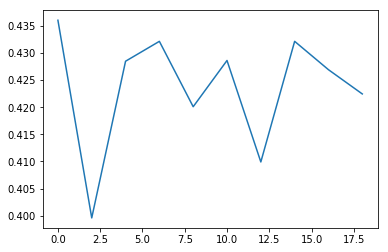

In [238]:
average = check_lambda(lmd,2)

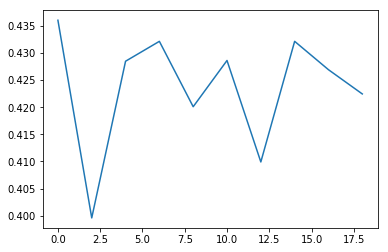

In [239]:
plt.plot(lmd,average)

Iteration0,cost=0.6931471805599453
Iteration1000,cost=0.3820346628560454
Iteration2000,cost=0.3734191668383894


{'F1': 80.62015503875968,
 'accuracy': 85.95505617977528,
 'cost': 0.4576221824622803,
 'precision': 85.24590163934425,
 'recall': 76.47058823529412}

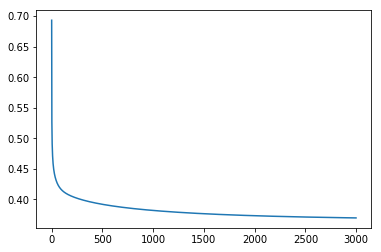

In [240]:
data = Data(to_train_data)
lr = LR(data.train,2)
lr.train(2,3000,0.1)
lr(data.val)

In [241]:
lr(data.val)

{'F1': 80.62015503875968,
 'accuracy': 85.95505617977528,
 'cost': 0.4576221824622803,
 'precision': 85.24590163934425,
 'recall': 76.47058823529412}

In [248]:
lr(data.test)

{'F1': 75.71428571428572,
 'accuracy': 81.00558659217877,
 'cost': 0.5230643246264878,
 'precision': 82.8125,
 'recall': 69.73684210526315}

In [249]:
to_test_data = to_train(datasets[1])

In [250]:
to_test_data['Survived'] = 0
ret = pd.DataFrame(columns=['PassengerId','Survived'])
ret.PassengerId = to_test_data.PassengerId
ret.Survived = np.around(lr.pred(to_test_data))

In [251]:
ret.to_csv('ret.csv',index=False)